# Visualization and Mapping using GeoPandas and Matplotlib

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
countries = gpd.read_file('ne_110m_admin_0_countries.zip')
countries.head()

iso_a3                  name      continent     pop_est  gdp_md_est  \
0    AFG           Afghanistan           Asia  34124811.0     64080.0   
1    AGO                Angola         Africa  29310273.0    189000.0   
2    ALB               Albania         Europe   3047987.0     33900.0   
3    ARE  United Arab Emirates           Asia   6072475.0    667200.0   
4    ARG             Argentina  South America  44293293.0    879400.0   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...  
2  POLYGON ((21.02004 40.84273, 20.99999 40.58, 2...  
3  POLYGON ((51.57952 24.2455, 51.75744 24.29407,...  
4  MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...

In [3]:
countries.shape

(177, 6)

In [4]:
cities = gpd.read_file('/content/ne_110m_populated_places.zip')
cities.head()

name                   geometry
0  Vatican City  POINT (12.45339 41.90328)
1    San Marino   POINT (12.44177 43.9361)
2         Vaduz   POINT (9.51667 47.13372)
3       Lobamba     POINT (31.2 -26.46667)
4    Luxembourg      POINT (6.13 49.61166)

In [5]:
cities.shape

(243, 2)

In [6]:
rivers = gpd.read_file('/content/ne_50m_rivers_lake_centerlines.zip')
rivers.head()

featurecla      name  \
0  Lake Centerline      Kama   
1            River      Kama   
2  Lake Centerline      Abay   
3  Lake Centerline  Al Furat   
4  Lake Centerline   Alabama   

                                            geometry  
0  LINESTRING (51.93713 55.70107, 51.88087 55.686...  
1  LINESTRING (53.69385 58.20632, 53.67715 58.273...  
2  LINESTRING (37.11301 11.85499, 37.15037 11.893...  
3  LINESTRING (38.56119 35.86264, 38.36534 35.903...  
4  MULTILINESTRING ((-86.52177 33.03212, -86.5209...

In [7]:
rivers.shape

(461, 3)

<Axes: >

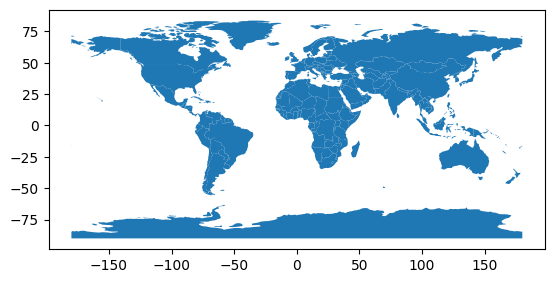

In [8]:
countries.plot()

<Axes: >

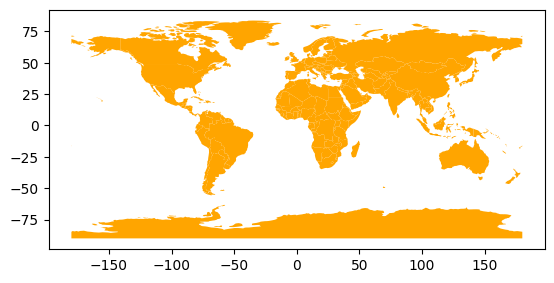

In [9]:
countries.plot(color='orange')

<Axes: >

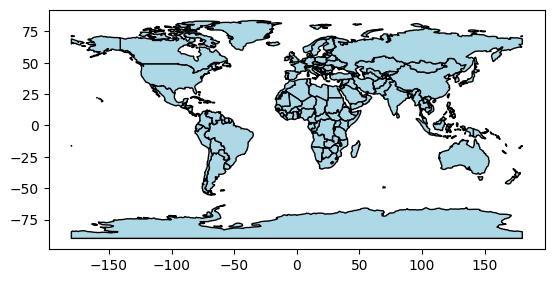

In [10]:
countries.plot(color='lightblue', edgecolor='black')

<Axes: >

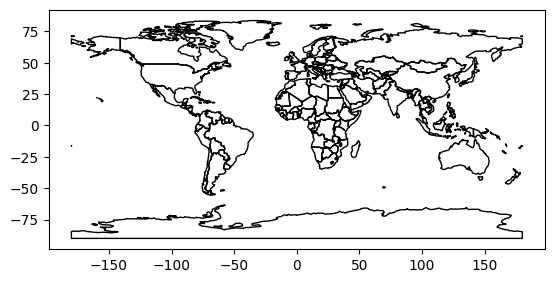

In [11]:
countries.boundary.plot(linewidth=1, color='black')

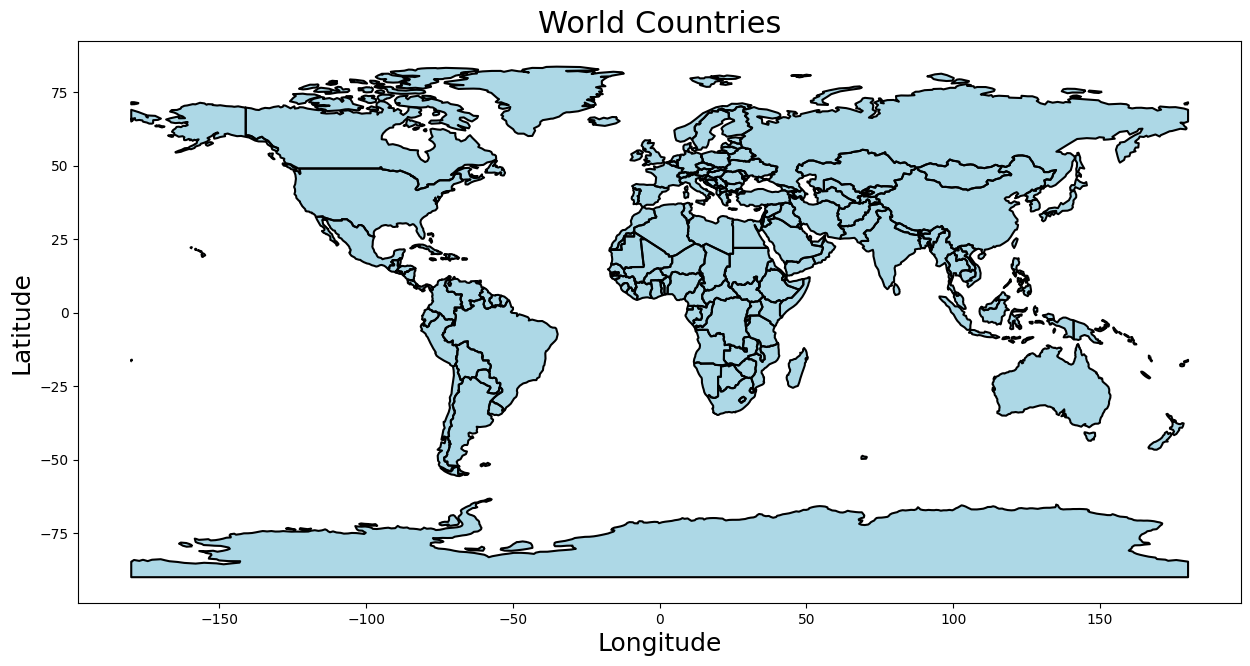

In [12]:
# Plot countries along with their borders
fig, axes = plt.subplots(figsize=(15, 10))
countries.boundary.plot(ax=axes, linewidth=1.5, color='black')
countries.plot(ax=axes, color='lightblue')

plt.title('World Countries', fontsize=22)
plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)

plt.show()

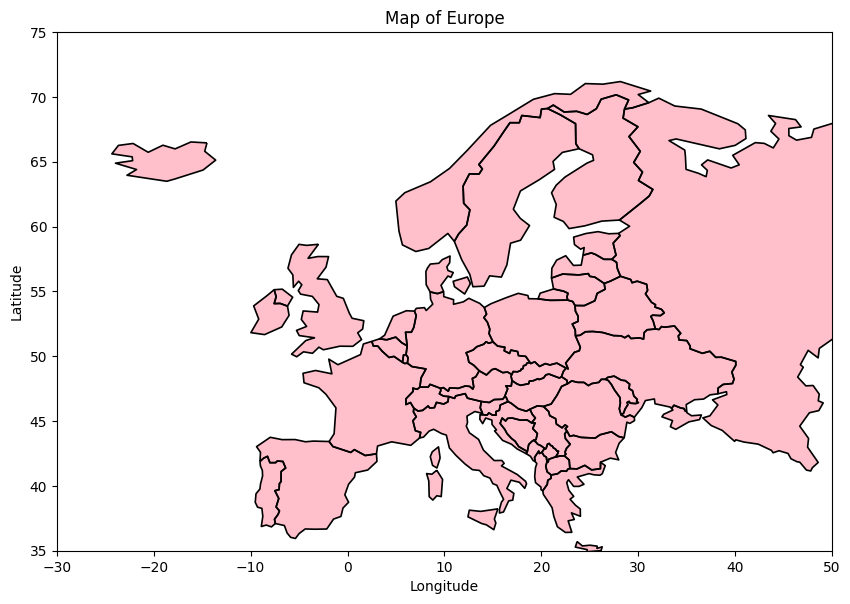

In [13]:
# Zoom into Europe
europe = countries[countries['continent']=='Europe']

fig, ax = plt.subplots(figsize=(10,10))
europe.boundary.plot(ax=ax, linewidth=1.2, color='black')
europe.plot(ax=ax, color='pink')
plt.title('Map of Europe')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-30,50)
plt.ylim(35,75)
plt.show()

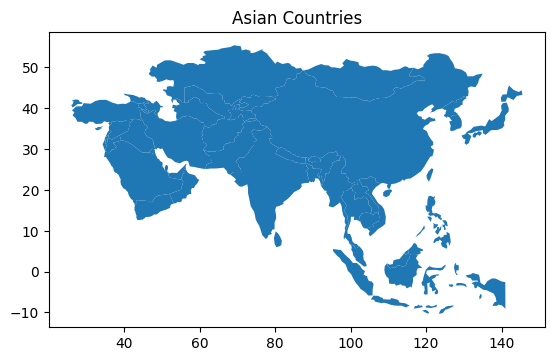

In [14]:
# Filter Asian countries
asian_countries = countries[countries['continent']=='Asia']
asian_countries.plot()
plt.title('Asian Countries')
plt.show()

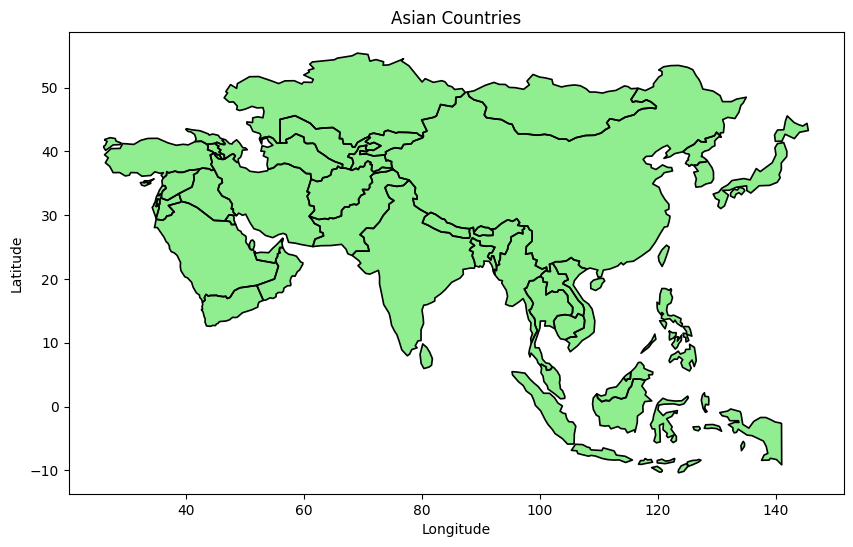

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
asian_countries.boundary.plot(ax=ax, linewidth=1.2, color='black')
asian_countries.plot(ax=ax, color='lightgreen')
plt.title('Asian Countries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [16]:
import pandas as pd

# Create a sample DataFrame
data = {
    'name': ['Country A', 'Country B'],
    'population': [10000000, 20000000]
}
df = pd.DataFrame(data)

# Iterate over the DataFrame
for index, row in df.iterrows():
    print(f"Index: {index}, Name: {row['name']}, Population: {row['population']}")

Index: 0, Name: Country A, Population: 10000000
Index: 1, Name: Country B, Population: 20000000


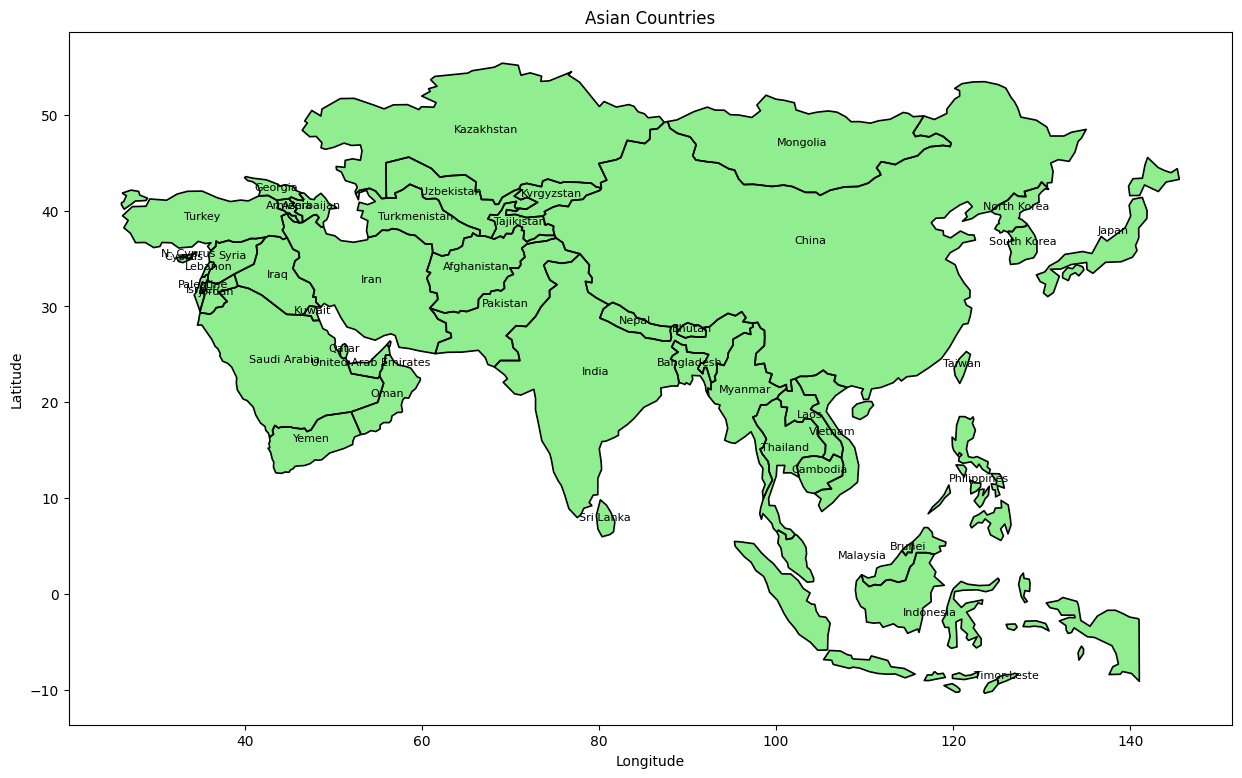

In [17]:
# Plot Asian countries with annotation
fig, ax = plt.subplots(figsize=(20,9))

asian_countries.boundary.plot(ax=ax, linewidth=1.2, color='black')
asian_countries.plot(ax=ax, color='lightgreen')

# Annotate Country names
for index, country in asian_countries.iterrows():
    centroid = country.geometry.centroid
    ax.text(centroid.x, centroid.y, country['name'], ha='center', fontsize=8)

plt.title('Asian Countries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Axes: >

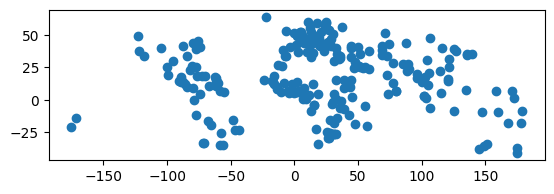

In [18]:
cities.plot()

In [19]:
# Example list of Longitude and Latitude
latitudes = [34.0522, 40.7128, 37.7749]
longitudes = [-118.2437, -74.0060, -122.4194]

# Combine them using zip()
coordinates = list(zip(latitudes, longitudes))
coordinates

[(34.0522, -118.2437), (40.7128, -74.006), (37.7749, -122.4194)]

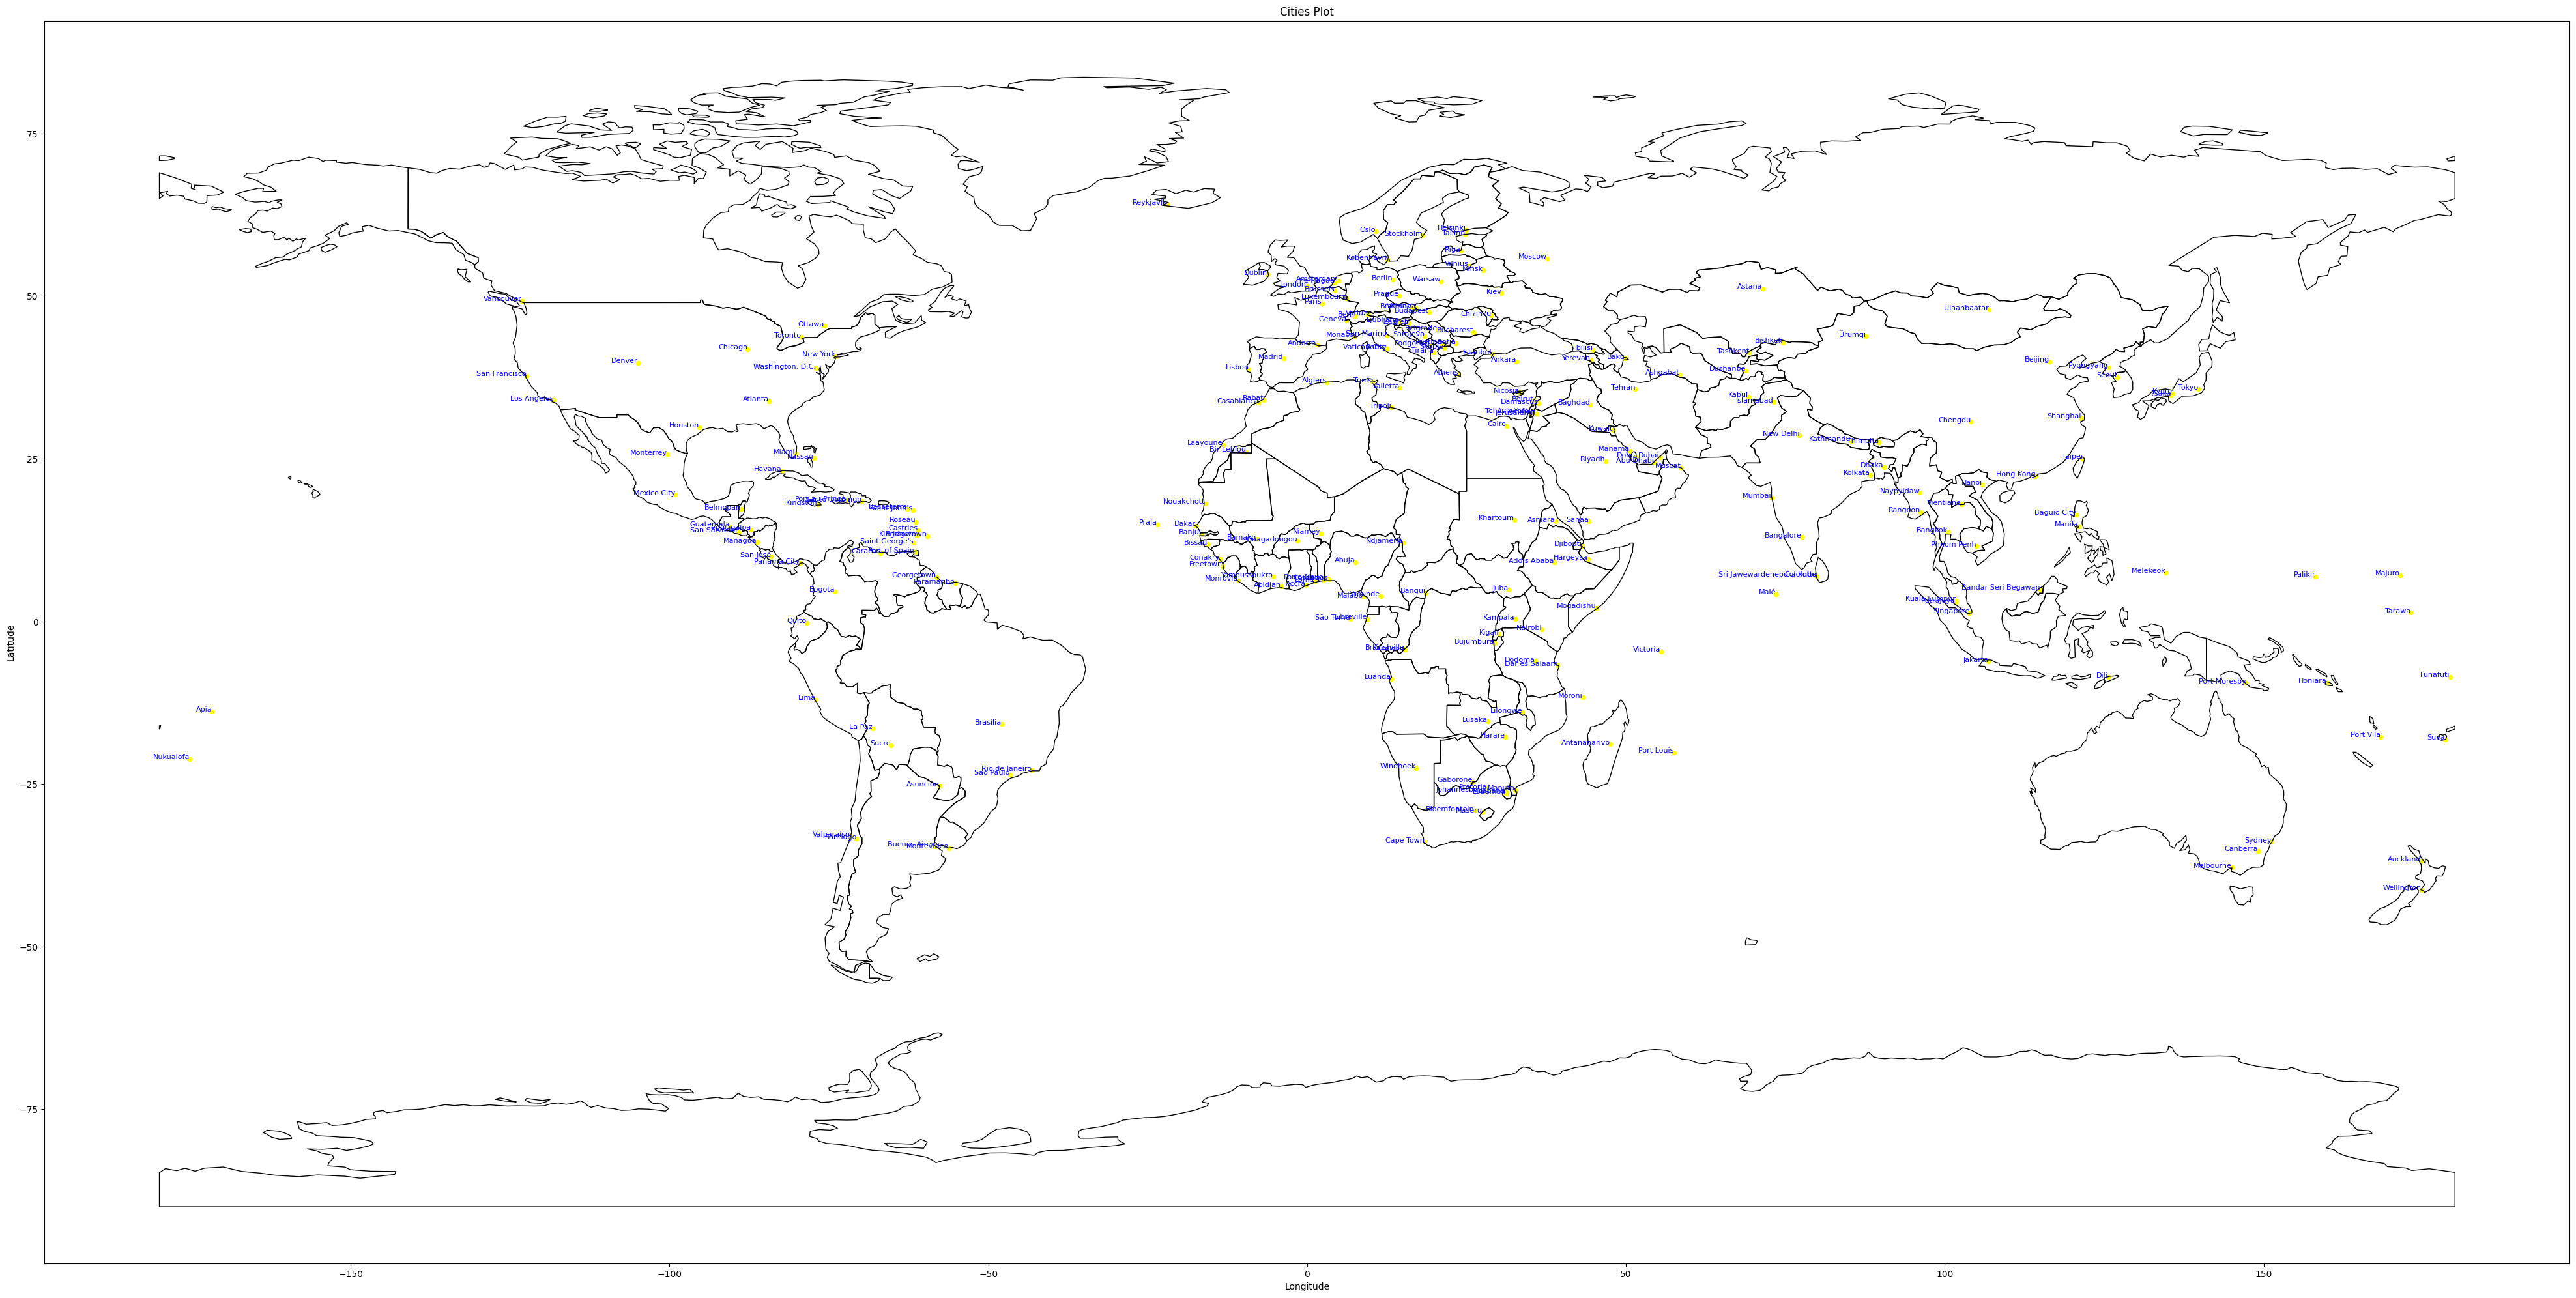

In [20]:
fig, ax = plt.subplots(figsize=(50,30))

countries.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the cities
cities.plot(ax=ax, color='yellow', markersize=20)

# Annotate the cities
for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities['name']):
    ax.text(x, y, label, fontsize=8, ha='right', color='blue')

plt.title('Cities Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Axes: >

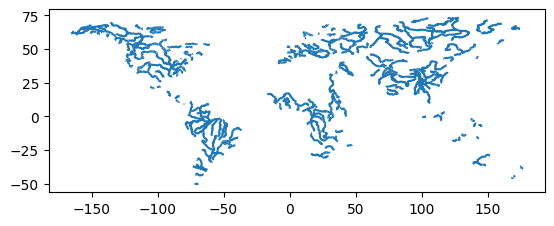

In [21]:
rivers.plot()

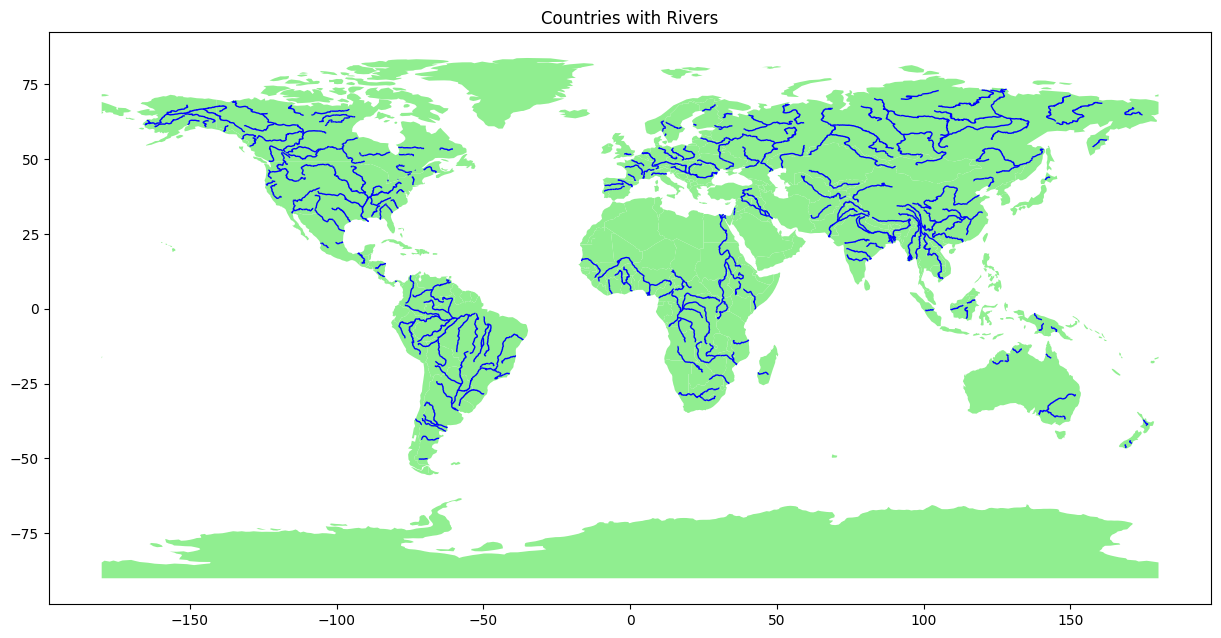

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
countries.plot(ax=ax, color='lightgreen')
rivers.plot(ax=ax, linewidth=1, color='blue')
plt.title('Countries with Rivers')
plt.show()

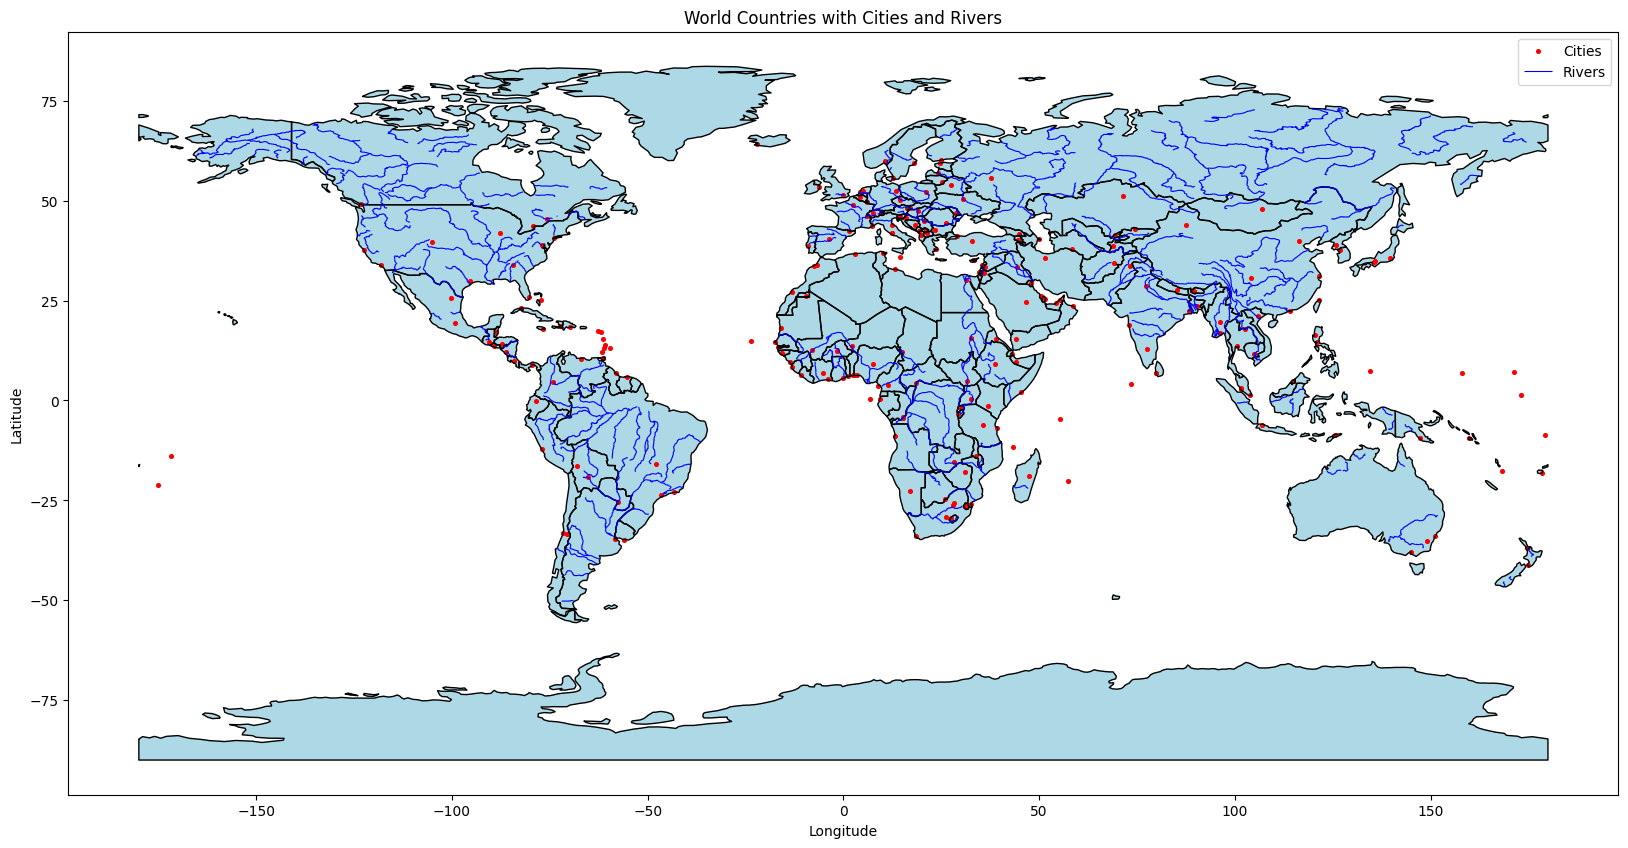

In [23]:
fig, ax = plt.subplots(figsize=(20,15))

countries.boundary.plot(ax=ax, linewidth=1, color='black')
countries.plot(ax=ax, color='lightblue')

# Plot the cities
cities.plot(ax=ax, color='red', markersize=7, label='Cities')

# Plot rivers
rivers.plot(ax=ax, color='blue', linewidth=0.8, label='Rivers')

plt.title('World Countries with Cities and Rivers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

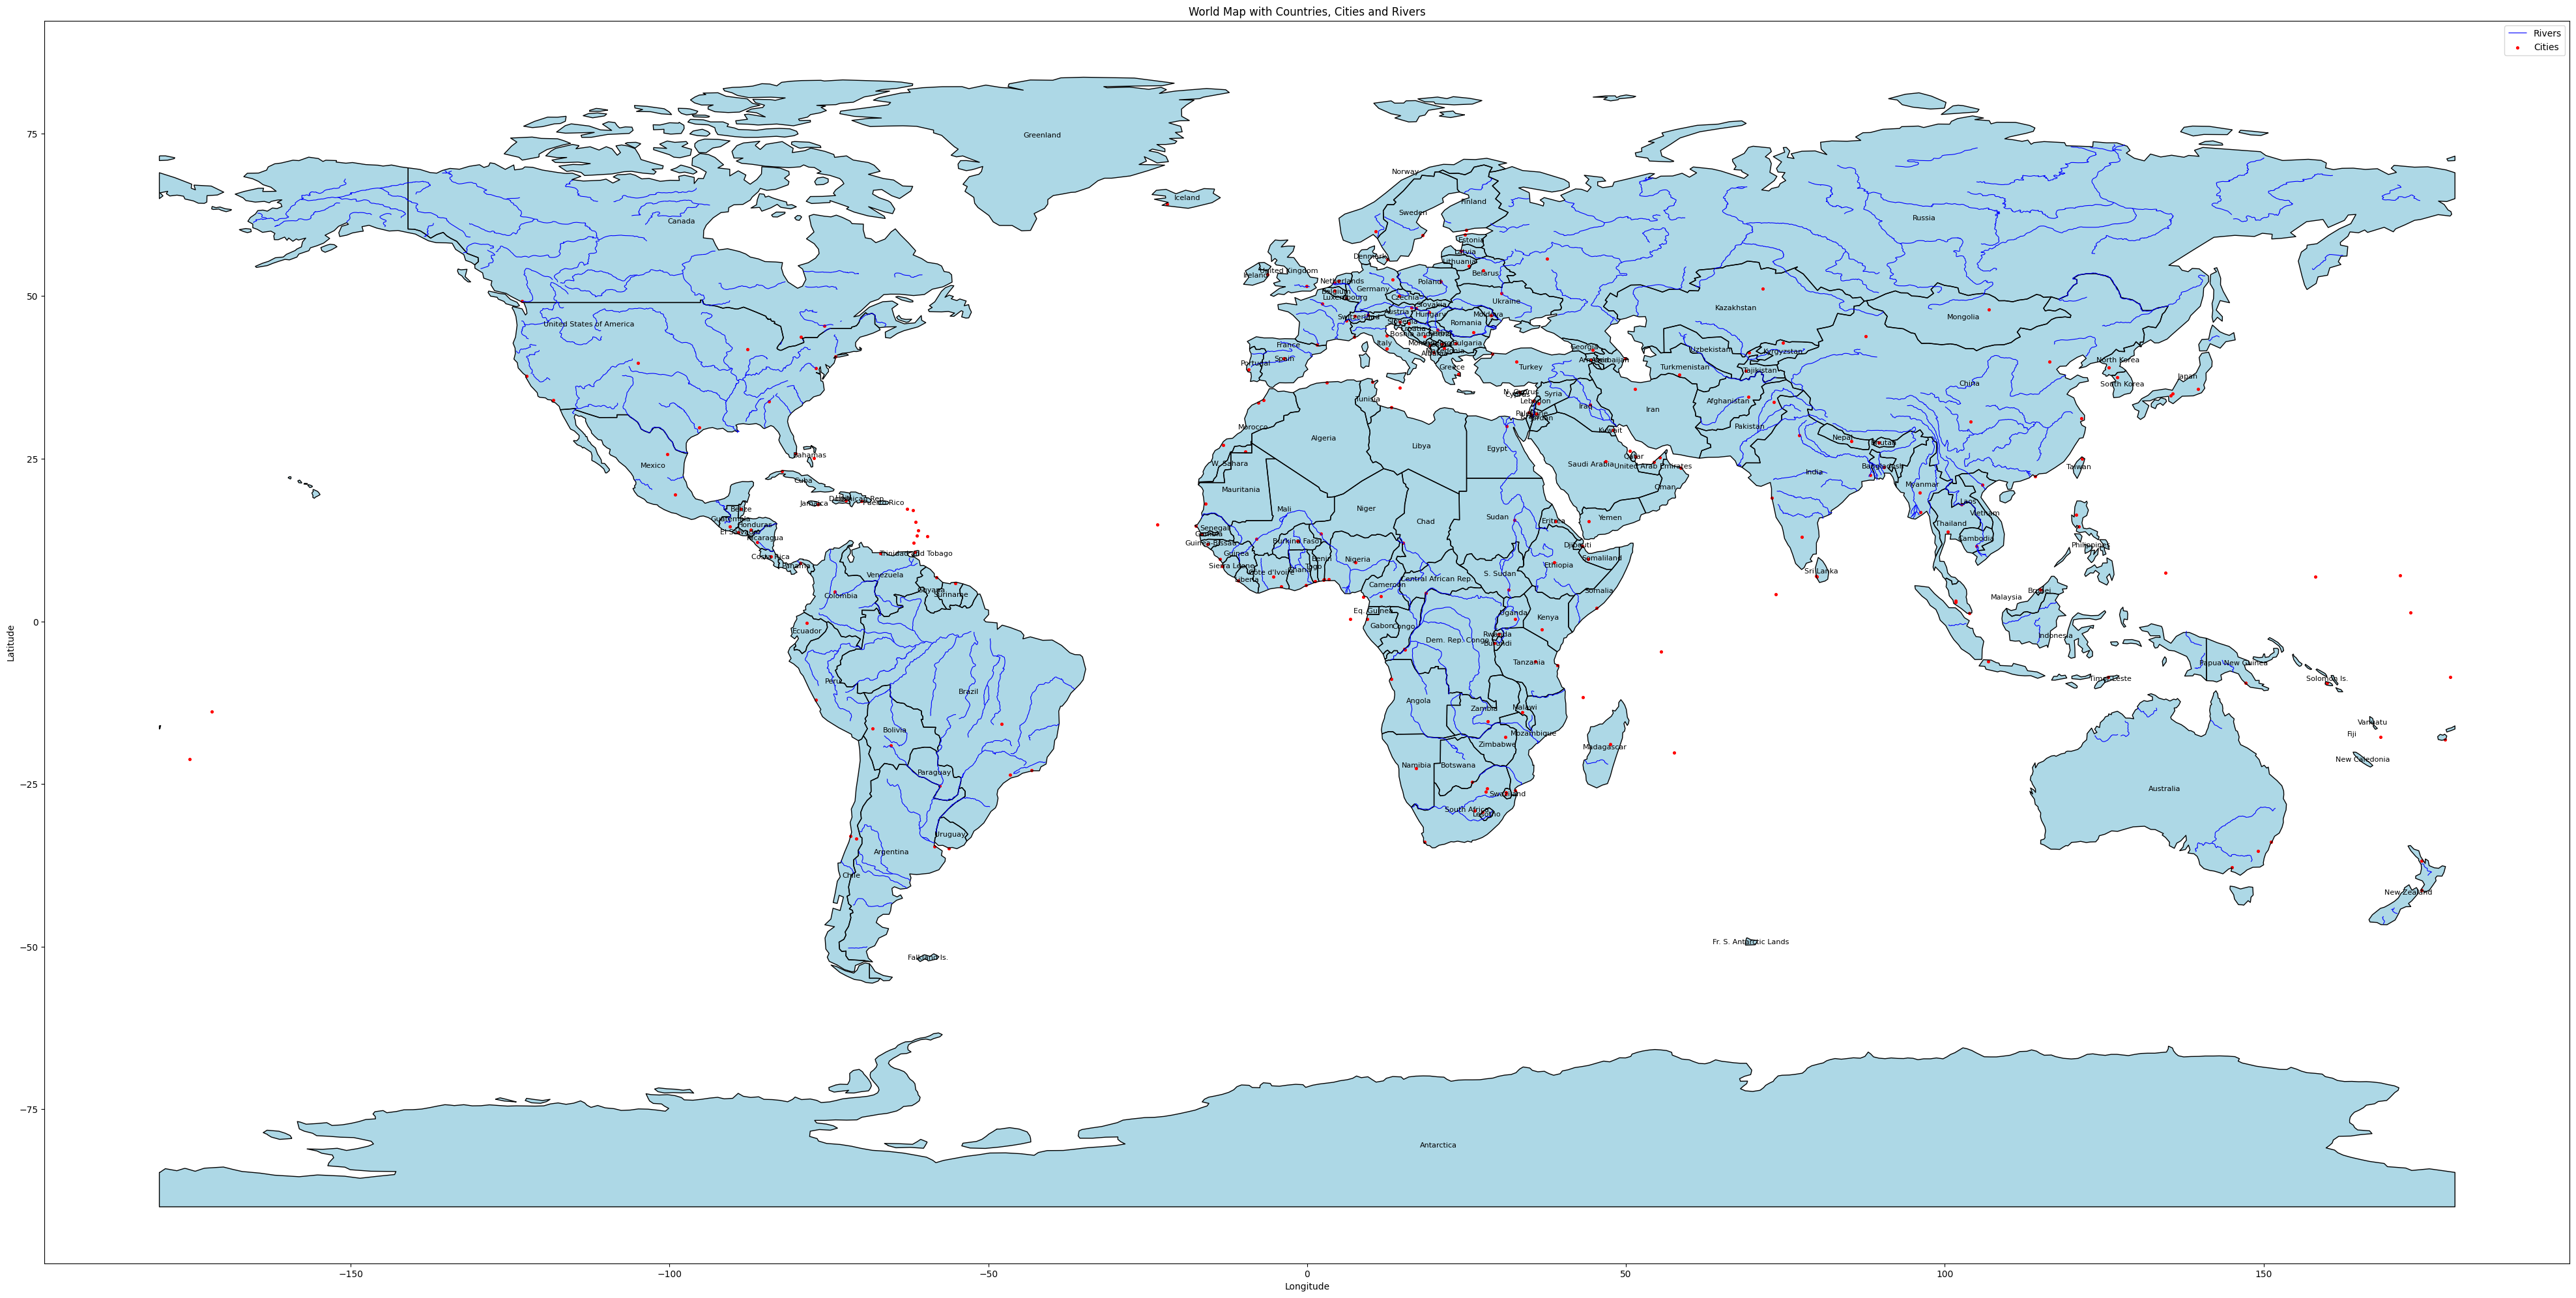

In [24]:
# World Map with Counties, Cities and Rivers
fig, ax = plt.subplots(figsize=(50,40))

countries.boundary.plot(ax=ax, linewidth=1, color='black')
countries.plot(ax=ax, color='lightblue')

# Plot rivers
rivers.plot(ax=ax, color='blue', linewidth=0.8, label='Rivers')

# Plot the cities
cities.plot(ax=ax, color='red', markersize=7, label='Cities')

# Annotate the countries
for index, country in countries.iterrows():
    centroid = country.geometry.centroid
    ax.text(centroid.x, centroid.y, country['name'], ha='center', va='center', fontsize=8)


plt.title('World Map with Countries, Cities and Rivers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [25]:
# Save the last figure
fig.savefig('world_map.png', dpi=300, bbox_inches='tight')

In [26]:
countries.head()

iso_a3                  name      continent     pop_est  gdp_md_est  \
0    AFG           Afghanistan           Asia  34124811.0     64080.0   
1    AGO                Angola         Africa  29310273.0    189000.0   
2    ALB               Albania         Europe   3047987.0     33900.0   
3    ARE  United Arab Emirates           Asia   6072475.0    667200.0   
4    ARG             Argentina  South America  44293293.0    879400.0   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...  
2  POLYGON ((21.02004 40.84273, 20.99999 40.58, 2...  
3  POLYGON ((51.57952 24.2455, 51.75744 24.29407,...  
4  MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...

In [27]:
# Summary statistics for population and GDP
countries[['pop_est', 'gdp_md_est']].describe().astype(int)

pop_est  gdp_md_est
count         177         177
mean     41712369      666896
std     145969090     2289440
min           140          16
25%       3360148       25810
50%       9961396       84930
75%      29384297      410400
max    1379302771    21140000

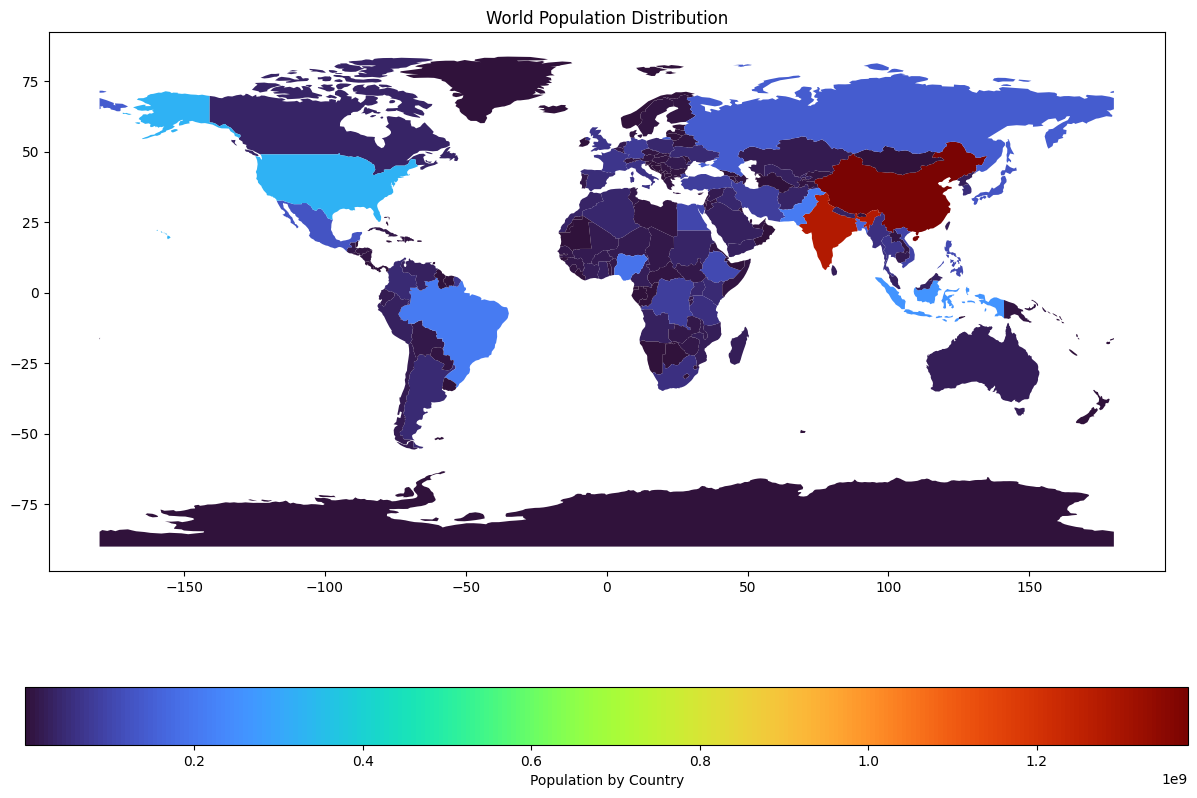

In [28]:
# Choroplethe map of Population
fig, ax = plt.subplots(figsize=(15,10))

countries.plot(ax=ax, column='pop_est', cmap='turbo', legend=True,
               legend_kwds= {'label': 'Population by Country', 'orientation': 'horizontal'})

plt.title('World Population Distribution')
plt.show()

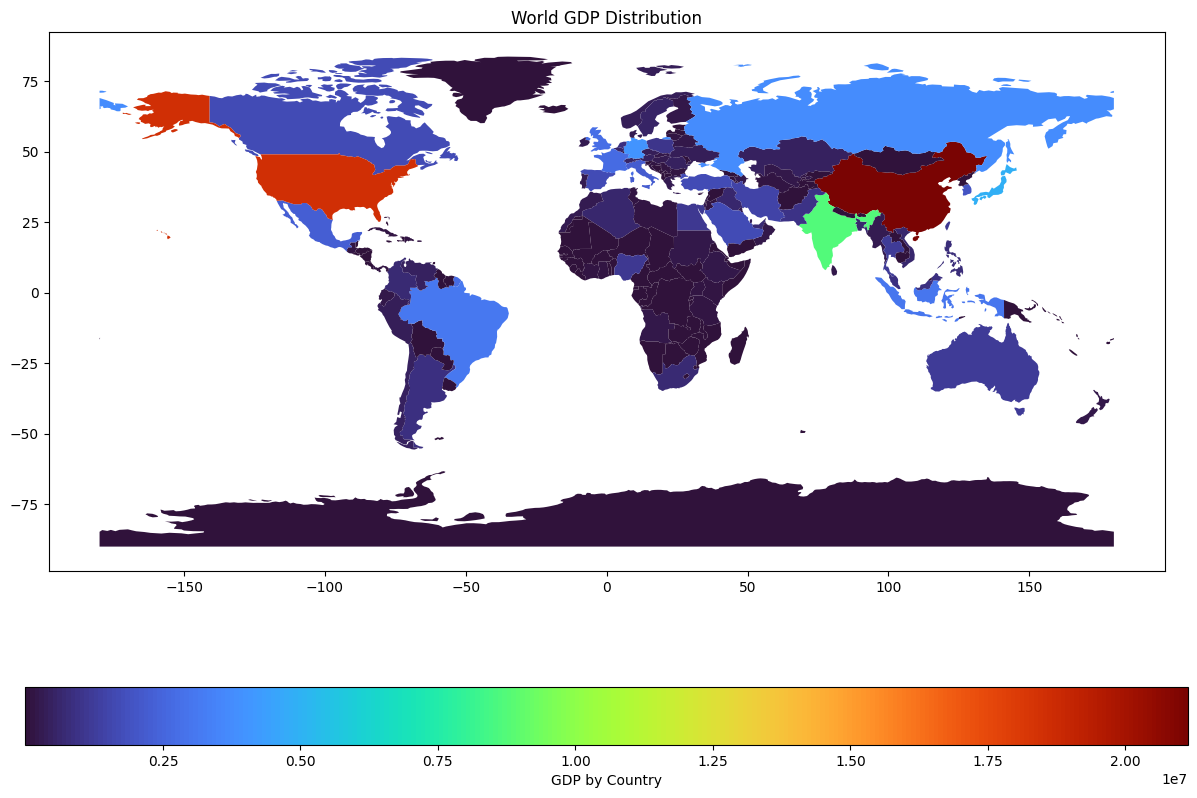

In [29]:
# Choroplethe map of GDP
fig, ax = plt.subplots(figsize=(15,10))

countries.plot(ax=ax, column='gdp_md_est', cmap='turbo', legend=True,
               legend_kwds= {'label': 'GDP by Country', 'orientation': 'horizontal'})

plt.title('World GDP Distribution')
plt.show()

# Interactive Maps with Folium

In [30]:
import folium

# Create a Base Map
m = folium.Map(location=[20,0], zoom_start=2)

# Add country borders
folium.GeoJson(countries).add_to(m)

# Add cities as markers
for index, city in cities.iterrows():
    folium.Marker(location=[city.geometry.y, city.geometry.x], popup=city['name']).add_to(m)

# Add rivers as lines
for _, river in rivers.iterrows():
    folium.GeoJson(river.geometry, style_function=lambda x: {'color': 'blue'}).add_to(m)

# Save interactive map
m.save('interactive_world_map.html')

In [31]:
# Create a Folium Map with layer control
m = folium.Map(location=[20,0], zoom_start=2)

# Country layer
folium.GeoJson(countries, name='Countries').add_to(m)

# City markers layer
for _, city in cities.iterrows():
    folium.Marker(location=[city.geometry.y, city.geometry.x], popup=city['name']).add_to(m)

# Rivers lines layer
for _, river in rivers.iterrows():
    folium.GeoJson(river.geometry, style_function=lambda x: {'color': 'blue'}, name='Rivers').add_to(m)

# Layer control
folium.LayerControl().add_to(m)

# Save interactive map
m.save('layered_world_map.html')

### Heapmap of Countries based on Population size

In [32]:
from folium.plugins import HeatMap

# Extract Coordinates and population data
heat_data = []

for _, country in countries.iterrows():
    geom = country['geometry']
    # ensure the geometry type is vaid
    if geom.is_empty:
         continue          # skips if the geometry is empty

    coords = list(geom.representative_point().coords)[0]

    # Append lalitude, longitude, population
    heat_data.append([coords[1], coords[0], country['pop_est']])

# Base map
m = folium.Map(location=[20,0], zoom_start=2)

# create Heatmap
HeatMap(heat_data, radius=15).add_to(m)

# Save
m.save('countries_population_heatmap.html')

### Choropleth

In [34]:
m = folium.Map(location=[20,0], zoom_start=2)

# Add a choropleth layer
folium.Choropleth(
    geo_data = countries,
    name= 'GDP',
    data=countries,
    columns=['name', 'gdp_md_est'],
    key_on='feature.properties.name',
    fill_color='Accent',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='GDP (in millions USD)',
    ).add_to(m)

# Add markers to city
for _, city in cities.iterrows():
    folium.Marker(location=[city.geometry.y, city.geometry.x], popup=city['name']).add_to(m)

# Add rivers as lines
for _, river in rivers.iterrows():
    folium.GeoJson(river.geometry, style_function=lambda x: {'color': 'blue'}, name='Rivers').add_to(m)

folium.LayerControl().add_to(m)
m.save('gdp_choropleth_map.html')